In [1]:
import numpy  as np
import pandas as pd
#import pandas_datareader.data as web
import matplotlib 
from matplotlib import style
import datetime as dt
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing as pre
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn import svm

dataset=pd.read_csv('1.csv')



In [19]:
#DATA PREPROCESSING
print(dataset.head(5))

print(dataset.isnull().any())
print(dataset.isnull().sum())

dataset.dtypes 
dataset.describe()


    Price    Open    High     Low  Change %
0  71.010  70.769  71.036  70.769      0.33
1  70.775  70.804  70.855  70.625     -0.02
2  70.789  70.552  70.802  70.552      0.04
3  70.760  70.972  70.990  70.760     -0.31
4  70.980  70.762  71.065  70.724      0.04
Price       False
Open        False
High        False
Low         False
Change %    False
dtype: bool
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64


,Price,Open,High,Low,Change %
count,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000
mean,53.002123,52.989943,53.179044,52.860538,0.009430
std,9.673824,9.684076,9.674283,9.661750,0.417506
min,39.075000,39.040000,39.260000,39.010000,-3.490000
25%,45.375000,45.365000,45.530000,45.265000,-0.170000
50%,48.370000,48.375000,48.530000,48.275000,0.000000
75%,62.980000,62.915000,63.167000,62.655000,0.170000
max,74.340000,74.380000,74.490000,74.060000,3.760000


In [3]:
dataset = dataset.drop(columns=['Date' ] , axis=1)
display(dataset)
dataset.to_csv('11.csv' , index= False)
dataset=pd.read_csv('11.csv')


,Price,Open,High,Low,Change %
0,71.010,70.769,71.036,70.769,0.33
1,70.775,70.804,70.855,70.625,-0.02
2,70.789,70.552,70.802,70.552,0.04
3,70.760,70.972,70.990,70.760,-0.31
4,70.980,70.762,71.065,70.724,0.04
...,...,...,...,...,...
4928,46.755,46.785,46.822,46.510,0.05
4929,46.730,46.750,46.795,46.620,-0.04
4930,46.750,46.750,46.810,46.700,0.05
4931,46.725,46.825,46.845,46.725,-0.04


In [4]:
# print("Price    --- mean:", np.mean(dataset['Price']),   "\t std:", np.std(dataset['Price']),   "\t max:", np.max(dataset['Price']),   "\t min:", np.min(dataset['Price']))
# print("Open    --- mean:", np.mean(dataset['Open']),   "\t std:", np.std(dataset['Open']),   "\t max:", np.max(dataset['Open']),   "\t min:", np.min(dataset['Open']))
# print("High    --- mean:", np.mean(dataset['High']),   "\t std:", np.std(dataset['High']),   "\t max:", np.max(dataset['High']),   "\t min:", np.min(dataset['High']))
# print("Low     --- mean:", np.mean(dataset['Low']),    "\t std:", np.std(dataset['Low']),    "\t max:", np.max(dataset['Low']),    "\t min:", np.min(dataset['Low']))
# print("Change %     --- mean:", np.mean(dataset['Change %']),    "\t std:", np.std(dataset['Change %']),    "\t max:", np.max(dataset['Change %']),    "\t min:", np.min(dataset['Change %']))

,Price,Open,High,Low,Change %
0,71.010,70.769,71.036,70.769,0.33
1,70.775,70.804,70.855,70.625,-0.02
2,70.789,70.552,70.802,70.552,0.04
3,70.760,70.972,70.990,70.760,-0.31
4,70.980,70.762,71.065,70.724,0.04


Text(0, 0.5, 'INR values')

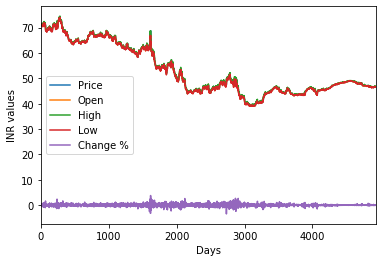

In [5]:

#dataset=pd.read_csv('11.csv')
display(dataset.head())
dataset.plot()
plt.xlabel("Days")
plt.ylabel("INR values")

In [6]:
#Rescaling


scaler=pre.MinMaxScaler(feature_range=(0,1))
rescaleData=scaler.fit_transform(dataset)
rescaleData=pd.DataFrame(rescaleData,index=dataset.index,columns=dataset.columns)
display(rescaleData)

,Price,Open,High,Low,Change %
0,0.905572,0.897821,0.901959,0.906106,0.526897
1,0.898908,0.898812,0.896821,0.901997,0.478621
2,0.899305,0.891681,0.895316,0.899914,0.486897
3,0.898483,0.903565,0.900653,0.905849,0.438621
4,0.904721,0.897623,0.902782,0.904822,0.486897
...,...,...,...,...,...
4928,0.217780,0.219157,0.214647,0.213980,0.488276
4929,0.217071,0.218166,0.213880,0.217118,0.475862
4930,0.217638,0.218166,0.214306,0.219401,0.488276
4931,0.216929,0.220289,0.215299,0.220114,0.475862


In [7]:
#Standardization
# scaler=StandardScaler().fit(dataset)
# standardizedData=scaler.transform(dataset)
# standardizedData=pd.DataFrame(standardizedData,index=dataset.index,columns=dataset.columns)
# display(standardizedData)

In [8]:
#Normalization
# scaler=Normalizer().fit(dataset)
# normalizedData=scaler.transform(dataset)
# normalizedData=pd.DataFrame(normalizedData,index=dataset.index,columns=dataset.columns)
# display(normalizedData)

In [9]:
#Binarization
binarizer=Binarizer(threshold=0.0).fit(dataset)
binData=binarizer.transform(dataset)
binData=pd.DataFrame(binData,index=dataset.index,columns=dataset.columns)
display(binData)

,Price,Open,High,Low,Change %
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
4928,1.0,1.0,1.0,1.0,1.0
4929,1.0,1.0,1.0,1.0,0.0
4930,1.0,1.0,1.0,1.0,1.0
4931,1.0,1.0,1.0,1.0,0.0


In [10]:
#TRAINING AND TESTING 
#LINEAR REGRESSION

from sklearn.model_selection import train_test_split
x=dataset.drop('Price' , axis=1)
y=dataset.Price
#y=dataset.label
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=900)

# print("\ntrain_x:\n")
# display(train_x)
# display(train_x.shape)

# print("\ntest_x:\n")
# display(test_x)
# display(test_x.shape)


from sklearn.linear_model import LinearRegression
from sklearn import metrics
# lr=LinearRegression()
# lr.fit(train_x, train_y)

lr=LinearRegression()
lr.fit(train_x, train_y)

predictions=lr.predict(test_x)
#display(predictions)
print(predictions[5] ,test_x)
print("Accuracy: ",lr.score(test_x, test_y))

print("intercept:",lr.intercept_)
print("coef:",lr.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predictions)))

45.3700874653602         Open    High     Low  Change %
2700  48.025  48.165  47.775      0.05
253   71.995  71.995  71.715      0.09
1247  61.515  61.520  61.475      0.07
2969  42.755  43.000  42.645      0.25
378   68.330  68.330  67.718     -0.89
...      ...     ...     ...       ...
886   67.188  67.396  67.061      0.16
3977  46.200  46.470  46.200      0.15
1078  66.117  66.260  65.670     -0.31
2064  51.725  51.915  51.540      0.15
4532  48.940  48.957  48.860     -0.08

[1480 rows x 4 columns]
Accuracy:  0.9999501431116481
intercept: -0.022634187728527877
coef: [0.14595636 0.41847615 0.43575401 0.27517075]
Mean Absolute Error: 0.0481891873309054
Mean Squared Error: 0.004687604433735325
Root Mean Squared Error: 0.06846608236006589


In [11]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
df = pd.DataFrame(dataset.Price)
y =  pd.DataFrame(dataset.High)
df.shape,y.shape



kf = KFold(n_splits = 5, shuffle = True)
rf_reg = RandomForestRegressor()

scores = []
for i in range(5):
    result = next(kf.split(df), None)
    x_train = df.iloc[result[0]]
    x_test = df.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = rf_reg.fit(x_train,y_train)
    predictions = rf_reg.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

c:\users\ritesh\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\ritesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\ritesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\ritesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Scores from each Iteration:  [0.9996674575401779, 0.9996428240967057, 0.9997259319006283, 0.9997206095749107, 0.9996735753134114]
Average K-Fold Score : 0.9996860796851669


c:\users\ritesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


ValueError: x and y must be the same size

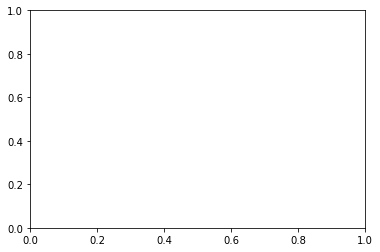

In [12]:
from matplotlib import pyplot as plt
plt.scatter(test_y , predictions)
plt.xlabel("True Values")
plt.ylabel("predictions")

In [ ]:
dataset.plot()

plt.xlabel("Days")
plt.ylabel("predictions/Price")


In [ ]:
#ARIMA 


from statsmodels.tsa.arima_model import ARIMA
from random import random
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools  as ts



In [ ]:
Price=dataset['Price']
print(Price)

In [ ]:
lnprice=np.log(Price)
print(lnprice)
plt.plot(lnprice)
plt.show()

In [ ]:
import pandas
acf_1=acf(lnprice) [1:20]
test_df=pandas.DataFrame([acf_1]).T
test_df.columns=['Autocorrelation']
test_df.index +=1
test_df.plot()
plt.show()

In [ ]:
pacf_1=pacf(lnprice) [1:20]
test_df=pandas.DataFrame([acf_1]).T
test_df.columns=['Partial Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
plt.show()

In [ ]:
result=ts.adfuller(lnprice,1)
print(result)
lnprice_diff=lnprice-lnprice.shift()
diff=lnprice_diff.dropna()
acf_1_diff=acf(diff)[1:20]
test_df=pandas.DataFrame([acf_1_diff]).T
test_df.columns=['first difference Autocorrelation']
test_df.index +=1

test_df.plot(kind='bar')
pacf_1_diff=pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

In [ ]:
test_df=pandas.DataFrame([pacf_1_diff]).T

test_df.columns=['first difference partial Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')


In [ ]:
Price_matrix=lnprice.as_matrix()
model = ARIMA(Price, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
predictionss=model_fit.predict(68, 70, typ='levels')
print(predictionss)
predictionssadjusted=np.exp(predictionss)

print(predictionssadjusted)

plt.plot(predictionssadjusted)
plt.title('forcasted price')
plt.show()




In [ ]:
predictionss.describe()